# Machine Learning with Linear Regression

This project is the first in a series of Machine Learning micro projects. These small projects demonstrate how we can use scikit-learn to create ML models in Python, dealing with a variety of datasets. 

For this project, we have a (fake) dataset from a (fake) Ecommerce company that sells clothing online but also has in-store style and clothing advice sessions. After their sessions, customers can go home and use a mobile app, or the store's website to make purchases. 

The company wants to decide whether to focus their efforts on their mobile app experience or their website, depending on which one of them has the greater impact.

Let's try to answer their question.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data

The dataset contains customer info, such as Email, Address, and their Avatar. But as this is a regression project, we'll deal with the numerical features we have: 

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 


In [2]:
customers = pd.read_csv('data/Ecommerce Customers')

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


## Exploratory Analysis

Before we begin fitting a linear regression model on the data, let's try and eyeball it first.

Visualising the relationship between time spent on Website and yearly spend.

C:\Users\yizhe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\yizhe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


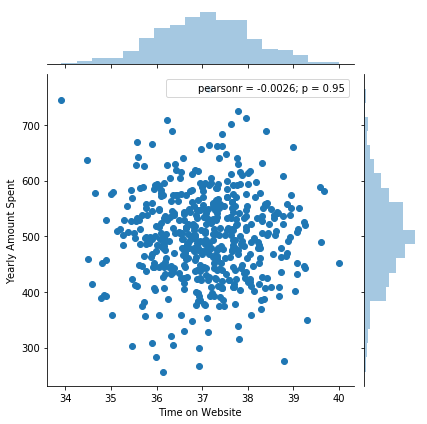

In [6]:
sns.jointplot(customers['Time on Website'],customers['Yearly Amount Spent'])

Visualising the relationship between time spent on app, and yearly spend.

C:\Users\yizhe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\yizhe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


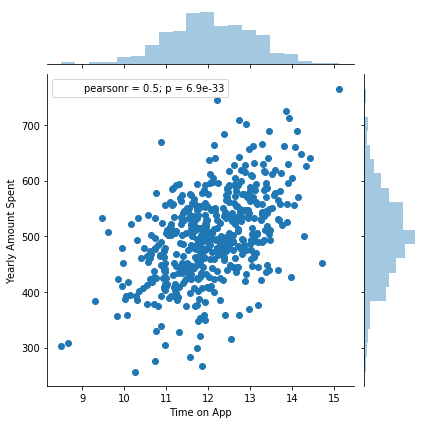

In [7]:
sns.jointplot(customers['Time on App'],customers['Yearly Amount Spent'])

Just from the above two visuals, we can conclude that there's a stronger correlation between time spent on app, and the yearly spend, than time spent on the website.

Let's visualise the relationship between the different variables using a seaborn pairplot.

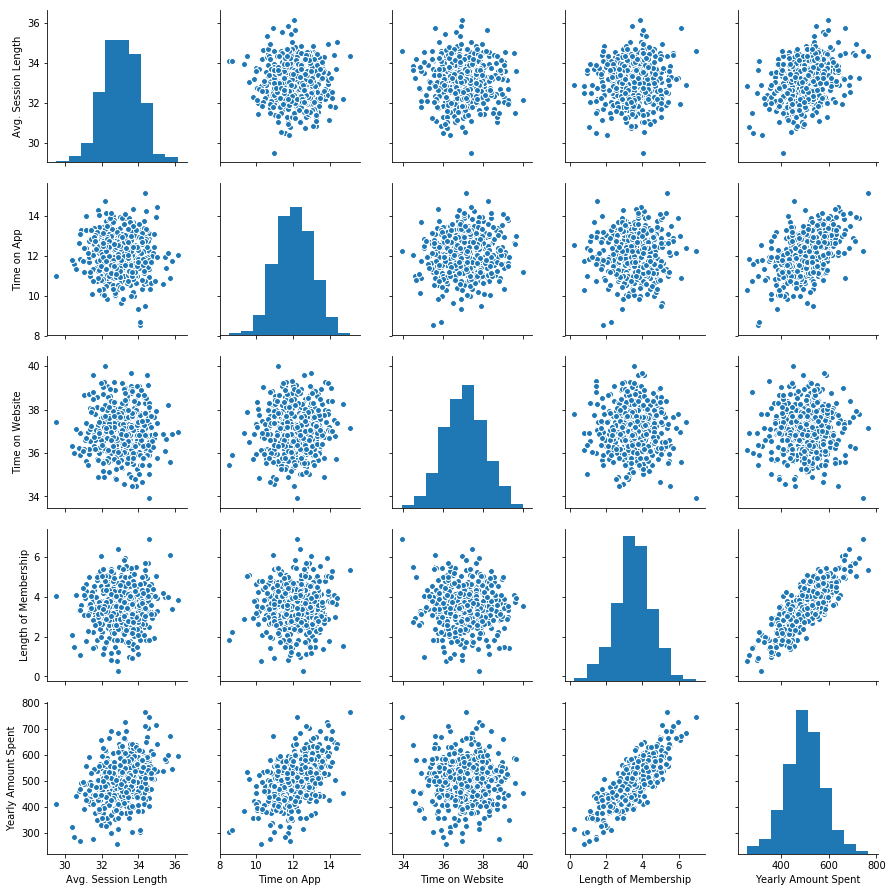

In [8]:
sns.pairplot(customers)

In [9]:
customers.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


It looks like the length of membership is the feature that's the most (positively) correlated with yearly amount spent. This makes sense, as loyal customers are inclined to spend more.

We can use seaborn the fit this on a linear plot.

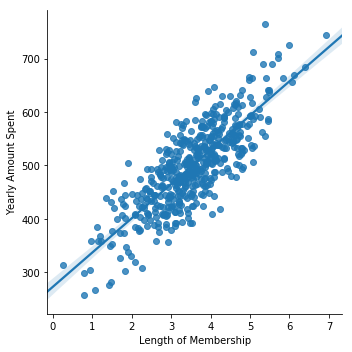

In [10]:
sns.lmplot('Length of Membership','Yearly Amount Spent',data=customers)

## Splitting the Data

We're going to split the data between training and test sets, in a 70:30 ratio.

In [11]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [12]:
#Selecting only the numerical features for training the model.
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_test,X_train,y_test,y_train = train_test_split(X,y,test_size=0.3,random_state=101)

## Training the Model

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lm = LinearRegression()

In [17]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Making Predictions


In [18]:
predictions = lm.predict(X_test) 

** Create a scatterplot of the real test values versus the predicted values. **

To visualise the predictions, let's create a scatterplot between real and predicted values.

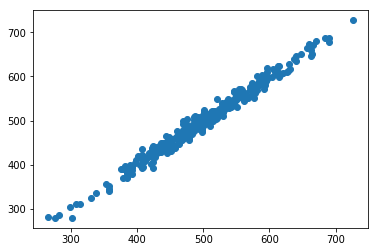

In [19]:
plt.scatter(y_test,predictions)

Nice, it looks like our model performs fairly well, as the our predictions and real values fit linearly without much variation.

## Evaluation and Understanding Results

But there's a standard way to evaluate linear regression models. Let's calculate the residual sum of squares.

In [20]:
from sklearn import metrics

In [21]:
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 8.277224105585313
MSE: 109.36337929836607
RMSE: 10.45769474111604


Let's try to interpret the coefficients for the variables.

In [22]:
cust_coeff = pd.DataFrame(lm.coef_,X.columns)
cust_coeff.columns = ['Coefficient']
cust_coeff

,Coefficient
Avg. Session Length,25.114639
Time on App,39.022188
Time on Website,0.767136
Length of Membership,62.247287


What the coefficients mean, is that, assuming all other features stay fixed,

- 1 unit increase in the Avg. Session Length leads to an approximate \$25 increase in yearly spend.
- 1 unit increase in the Time on App leads to an approximate \$39 increase in yearly spend.
- 1 unit increase in the Time on Website leads to an approximate \$0.77 increase in yearly spend.
- 1 unit increase in the Length of Membership leads to an approximate \$62 increase in yearly spend.


## App or Website? 

**So should the company focus more on their mobile app or on their website?**

Between the two, the mobile app seems to be doing better than the website, as we see a greater increase in the Yearly amount spent with an increase in the time spent on the app (as opposed to the marginal increase on with time on website). So there are two ways to approach the problem:

- The company either focuses on the website to have it catch up in terms of the mobile app. Or,
- They can focus on the mobile app, to maximise the benefits.

What we could also explore is the relationship between length of membership, and the time on app or website, as the length of membership seems to be more important for yearly spend.